## Gaussian NB is recommended when features are continuous and normally distributed

In [5]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

## load data

In [6]:
iris=load_iris()

In [7]:
pdiris=pd.DataFrame(data=iris['data'],columns=['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])
pdiris=pdiris.rename(columns={'sepal length (cm)':'sepal_length','sepal width (cm)':'sepal_width','petal length (cm)':'petal_length','petal width (cm)':'petal_width'})
pdiris['target']=pd.DataFrame(data=iris['target']).apply(lambda x: iris['target_names'][x])
pdiris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [8]:
pdtarget=pd.DataFrame(data=iris['target'],columns=['species'])
pdtarget=pdtarget.apply(lambda x: iris['target_names'][x])
pdtarget.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


## Exploring data

In [9]:
pdiris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
target          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [10]:
pdiris.shape

(150, 5)

In [11]:
pdiris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
pdiris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [13]:
pdiris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


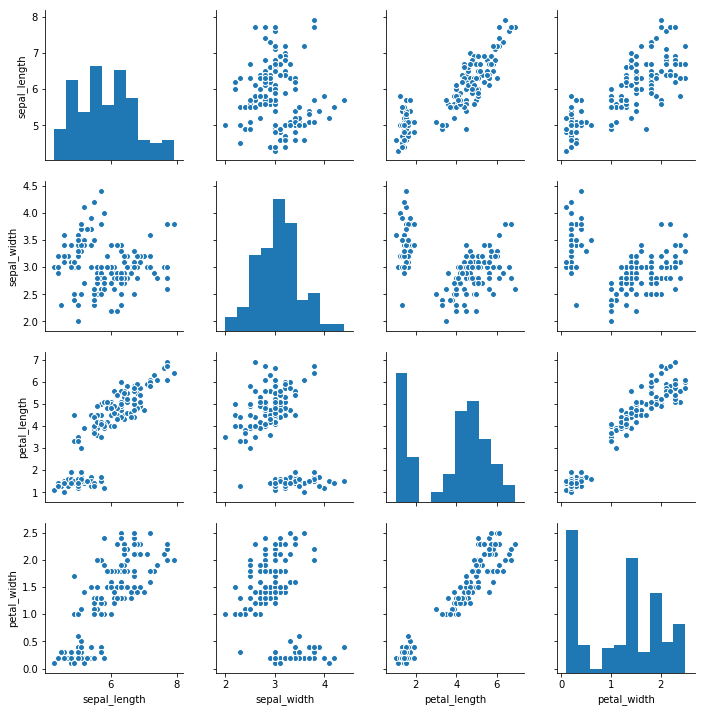

In [14]:
sns.pairplot(pdiris)
plt.show()

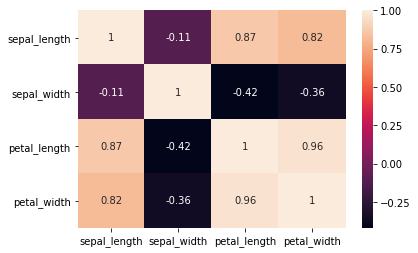

In [15]:
sns.heatmap(pdiris.corr(),annot=True)
plt.show()

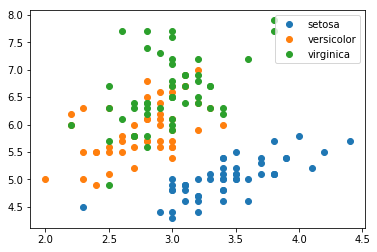

In [16]:
groups=pdiris.groupby(['target'])
fig,ax=plt.subplots()
ax.margins(.05)
for target, group in groups:
    ax.plot(group.sepal_width, group.sepal_length,marker='o',linestyle='',label=target)
ax.legend()
plt.show()

In [17]:
print(pdiris.groupby(['target']).corr())

                         petal_length  petal_width  sepal_length  sepal_width
target                                                                       
setosa     petal_length      1.000000     0.306308      0.263874     0.176695
           petal_width       0.306308     1.000000      0.279092     0.279973
           sepal_length      0.263874     0.279092      1.000000     0.746780
           sepal_width       0.176695     0.279973      0.746780     1.000000
versicolor petal_length      1.000000     0.786668      0.754049     0.560522
           petal_width       0.786668     1.000000      0.546461     0.663999
           sepal_length      0.754049     0.546461      1.000000     0.525911
           sepal_width       0.560522     0.663999      0.525911     1.000000
virginica  petal_length      1.000000     0.322108      0.864225     0.401045
           petal_width       0.322108     1.000000      0.281108     0.537728
           sepal_length      0.864225     0.281108      1.000000

## train model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [19]:
x_train,x_test,y_train,y_test=train_test_split(pdiris[['petal_length','petal_width','sepal_length','sepal_width']],pdiris['target'],random_state=123, test_size=.3)

In [21]:
model2=GaussianNB()
model2.fit(x_train,y_train)

GaussianNB(priors=None)

In [23]:
y_pred=model2.predict(x_test)

In [25]:
accuracy=accuracy_score(y_pred,y_test)
print('ac',accuracy)

ac 0.9555555555555556


In [26]:
print(model2.score(x_test,y_test)) 

0.9555555555555556


In [27]:
cm=confusion_matrix(y_pred,y_test)
print(cm)

[[18  0  0]
 [ 0 10  2]
 [ 0  0 15]]


In [28]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        18
 versicolor       0.83      1.00      0.91        10
  virginica       1.00      0.88      0.94        17

avg / total       0.96      0.96      0.96        45



## now we do grid search to find good parameters

In [30]:
from sklearn.model_selection import GridSearchCV

In this case GaussianNB only accepts priors as parameter, so there is nothing to do gridsearch